### EDA Proyecto Individual Telecomunicaciones

Importamos las librerias necesarias

In [1]:
import pandas as pd
import warnings
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Abrimos el fichero de datos que es un excel, llamado Internet_BAF

In [2]:
acceso_banda_ancha_angosta_provincia = pd.read_excel('dataexcel\Internet_BAF.xlsx')

Lo abrimos con pandas y lo guardamos en un dataframe

In [3]:
acceso_banda_ancha_angosta_provincia

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26304,460.0,26764
860,2014,1,Santa Fe,506000,612.0,506612
861,2014,1,Santiago Del Estero,37124,9.0,37133
862,2014,1,Tierra Del Fuego,27272,766.0,28038


Vemos si hay nulos en el dataframe

In [4]:
acceso_banda_ancha_angosta_provincia.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

Detectamos dos nulos, creamos un df para ver el contenido de esos datos nulos

In [5]:
null_data = acceso_banda_ancha_angosta_provincia[acceso_banda_ancha_angosta_provincia.isnull().any(axis=1)]
null_data

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


Al ver que los datos son dos NaN que no inlfuyen el resultado de la suma, los pasamos a 0

In [6]:
acceso_banda_ancha_angosta_provincia = acceso_banda_ancha_angosta_provincia.fillna(0)

Revisamos de nuevo si hay valores nulos, y como resultado vemos que no hay

In [7]:
acceso_banda_ancha_angosta_provincia.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             0
Total               0
dtype: int64

In [8]:
num_empty_values = acceso_banda_ancha_angosta_provincia.isnull().sum().sum()
num_empty_values

0

Usamos la funcion .info() para ver el tipo de datos de cada columna

In [255]:
acceso_banda_ancha_angosta_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           864 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


Usamos describe para ver los estadisticos de cada columna

In [256]:
acceso_banda_ancha_angosta_provincia.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.00,864.00,864.00,864.00,864.00
mean,2018.00,2.50,348148.46,961.65,349110.10
std,2.58,1.12,747621.90,2395.04,749485.37
min,2014.00,1.00,12193.00,0.00,12557.00
25%,2016.00,1.75,52215.25,7.75,52329.00
50%,2018.00,2.50,104412.00,142.50,104596.50
75%,2020.00,3.25,179156.75,619.00,180174.50
max,2022.00,4.00,4788466.00,15229.00,4794665.00


Creamos un boxplot para ver la distribucion de los datos y detectar outliers

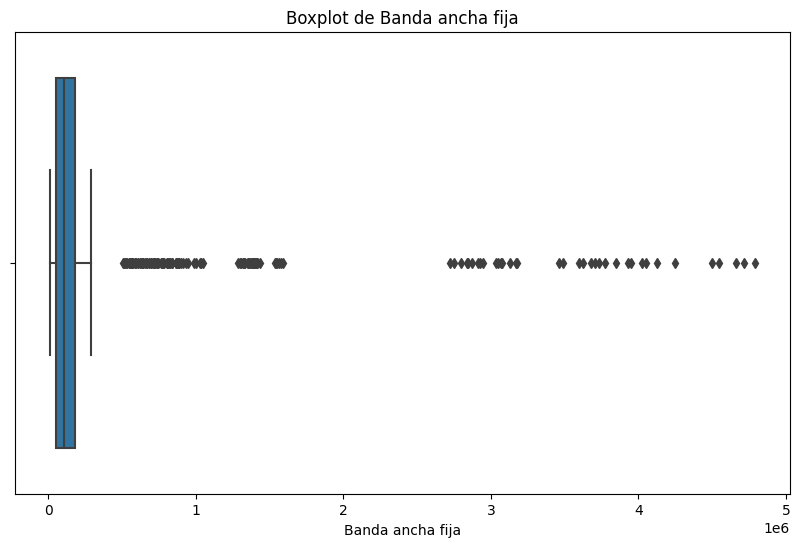

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Banda ancha fija', data=acceso_banda_ancha_angosta_provincia)
plt.title('Boxplot de Banda ancha fija')
plt.show()

Guardamos el archivo limpio en un csv

In [257]:
acceso_banda_ancha_angosta_provincia.to_csv('Accesos a banda ancha y banda angosta por provincia limpio.csv')

Abrimos el siguiente fichero de datos

In [10]:
acceso_internet_por_tegnologia_localidad = pd.read_excel('dataexcel\Internet-Accesos-por-tecno_por_loc.xlsx' )

Accedemos a la hoja de datos que nos interesa con los primeros 5

In [11]:
acceso_internet_por_tegnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


Revisamos si hay nulos

In [12]:
acceso_internet_por_tegnologia_localidad.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

Revisamos los diferentes tipos de valores de ADSL

In [13]:
acceso_internet_por_tegnologia_localidad.value_counts('ADSL')

ADSL
0         2014
1           49
2           19
3           13
13           8
          ... 
518          1
513          1
509          1
504          1
138753       1
Name: count, Length: 716, dtype: int64

Usamos info para ver el tipo de datos de cada columna

In [14]:
acceso_internet_por_tegnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   object
 4   ADSL           3137 non-null   int64 
 5   CABLEMODEM     3137 non-null   int64 
 6   DIAL UP        3137 non-null   int64 
 7   FIBRA OPTICA   3137 non-null   int64 
 8   OTROS          3137 non-null   int64 
 9   SATELITAL      3137 non-null   int64 
 10  WIMAX          3137 non-null   int64 
 11  WIRELESS       3137 non-null   int64 
 12  Total general  3137 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 318.7+ KB


Procedemos a usar describe para ver los estadisticos de cada columna

In [15]:
acceso_internet_por_tegnologia_localidad.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3137.000000,3.137000e+03,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3.137000e+03
mean,419.309213,1.924596e+03,3.967485,975.637552,64.918712,1.108065,0.691106,182.648709,3.572877e+03
std,3073.660025,2.363409e+04,44.745777,6599.934747,833.688135,15.515385,14.933928,705.881401,3.165879e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,1.560000e+02
75%,115.000000,7.000000e+00,0.000000,83.000000,0.000000,1.000000,0.000000,120.000000,1.012000e+03
max,138753.000000,1.238196e+06,2145.000000,222066.000000,29586.000000,852.000000,444.000000,20490.000000,1.551926e+06


Observamos otra vez los valores head para identificar la columna Link Indec

In [16]:
acceso_internet_por_tegnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


Vemos que valores hay en la columna Link Indec

In [17]:
acceso_internet_por_tegnologia_localidad.value_counts("Link Indec")

Link Indec
Sin Datos    72
6441030      27
6371010      27
6840010      15
6427010      15
             ..
18140010      1
18147030      1
18154010      1
18154020      1
38098030      1
Name: count, Length: 2714, dtype: int64

Cambiamos los valores Sin dato a 0

In [18]:
acceso_internet_por_tegnologia_localidad['Link Indec'] = acceso_internet_por_tegnologia_localidad['Link Indec'].replace('Sin Datos', 0)

Ahora vemos que la columna cambia de object a int

In [19]:
acceso_internet_por_tegnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   int64 
 4   ADSL           3137 non-null   int64 
 5   CABLEMODEM     3137 non-null   int64 
 6   DIAL UP        3137 non-null   int64 
 7   FIBRA OPTICA   3137 non-null   int64 
 8   OTROS          3137 non-null   int64 
 9   SATELITAL      3137 non-null   int64 
 10  WIMAX          3137 non-null   int64 
 11  WIRELESS       3137 non-null   int64 
 12  Total general  3137 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 318.7+ KB


Ya con la coluna en int, podemos usar describe para ver los estadisticos de cada columna

In [20]:
acceso_internet_por_tegnologia_localidad.describe()

,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3.137000e+03,3137.000000,3.137000e+03,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3.137000e+03
mean,3.888816e+07,419.309213,1.924596e+03,3.967485,975.637552,64.918712,1.108065,0.691106,182.648709,3.572877e+03
std,2.971448e+07,3073.660025,2.363409e+04,44.745777,6599.934747,833.688135,15.515385,14.933928,705.881401,3.165879e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.003505e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01
50%,3.400700e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,1.560000e+02
75%,6.610503e+07,115.000000,7.000000e+00,0.000000,83.000000,0.000000,1.000000,0.000000,120.000000,1.012000e+03
max,9.401402e+07,138753.000000,1.238196e+06,2145.000000,222066.000000,29586.000000,852.000000,444.000000,20490.000000,1.551926e+06


Creamos un scatter plot, estegráfico de dispersión muestra los valores de "Total general" ordenados de menor a mayor. Cada punto en el gráfico representa una fila en tus datos. El eje x representa el índice de cada fila y el eje y representa el valor de "Total general" para esa fila.

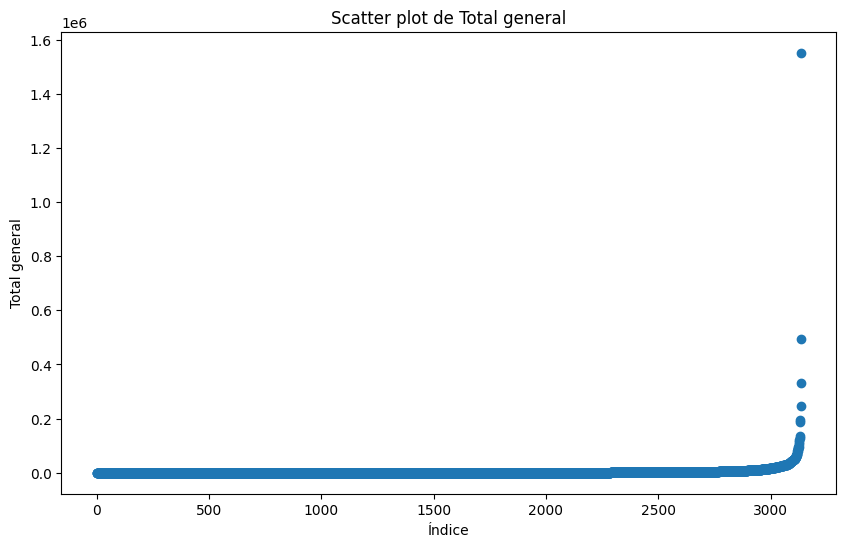

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(range(acceso_internet_por_tegnologia_localidad.shape[0]), acceso_internet_por_tegnologia_localidad['Total general'].sort_values())
plt.title('Scatter plot de Total general')
plt.xlabel('Índice')
plt.ylabel('Total general')
plt.show()

Ya limpio lo guardamos en un csv

In [72]:
acceso_internet_por_tegnologia_localidad.to_csv('Accesos a internet fijo por tecnologia y localidad limpio.csv')

Seguimos con el siguiente archivo, de inter acceso por velocidad provincia

In [22]:
acceso__internet_por_velocidad_bajada_provincia = pd.read_excel("dataexcel\Internet_Accesos-por-velocidad_provincia_sin rangos.xlsx")

Vemos las primeras filas de nuestro df

In [116]:
acceso__internet_por_velocidad_bajada_provincia.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.00,4.00,Buenos Aires,97634.00,18.00,0.00,0.00,28724.00,192.00,4611.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2022.00,4.00,Capital Federal,106772.00,31.00,0.00,0.00,451.00,34.00,1307.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2022.00,4.00,Catamarca,2280.00,0.00,0.00,0.00,34.00,37.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2022.00,4.00,Chaco,3909.00,0.00,225.00,111.00,234.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2022.00,4.00,Chubut,20026.00,8.00,0.00,0.00,69.00,32.00,836.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Revisamos si tenemos nuelos

In [117]:
acceso__internet_por_velocidad_bajada_provincia.isnull().sum()

Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
5125 Mbps     1
6000 Mbps     1
7000 Mbps     1
8000 Mbps     1
10000 Mbps    1
Length: 186, dtype: int64

Creamos un df solo con los nulos para ver los datos nulos

In [118]:

null_data2 = acceso__internet_por_velocidad_bajada_provincia[acceso__internet_por_velocidad_bajada_provincia.isnull().any(axis=1)]
null_data2

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Borrar los valores nulos del df

In [119]:

acceso__internet_por_velocidad_bajada_provincia = acceso__internet_por_velocidad_bajada_provincia.dropna()

Volvemos a revisar si hay nulos

In [120]:
acceso__internet_por_velocidad_bajada_provincia.isnull().sum()

Año           0
Trimestre     0
Provincia     0
Otros         0
0,256 Mbps    0
             ..
5125 Mbps     0
6000 Mbps     0
7000 Mbps     0
8000 Mbps     0
10000 Mbps    0
Length: 186, dtype: int64

En la columna de Otros, revisamos que valores tenemos para ver si no hay algun str

In [121]:
acceso__internet_por_velocidad_bajada_provincia.value_counts("Otros")

Otros
0.00         85
1035.00       4
2151.00       4
6105.00       3
2680.00       3
             ..
4081.00       1
4062.00       1
4029.00       1
3999.00       1
120987.00     1
Name: count, Length: 356, dtype: int64

Revisamos los primeros valores de la columna de Otros y las demas columnas

In [124]:
acceso__internet_por_velocidad_bajada_provincia.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.00,4.00,Buenos Aires,97634.00,18.00,0.00,0.00,28724.00,192.00,4611.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2022.00,4.00,Capital Federal,106772.00,31.00,0.00,0.00,451.00,34.00,1307.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2022.00,4.00,Catamarca,2280.00,0.00,0.00,0.00,34.00,37.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2022.00,4.00,Chaco,3909.00,0.00,225.00,111.00,234.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2022.00,4.00,Chubut,20026.00,8.00,0.00,0.00,69.00,32.00,836.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Usamos info para ver el tipo de datos de cada columna

In [125]:
acceso__internet_por_velocidad_bajada_provincia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 503
Columns: 186 entries, Año to 10000 Mbps
dtypes: float64(184), int64(1), object(1)
memory usage: 736.3+ KB


Convertimos las columnas Año y Trimestre a int

In [126]:
acceso__internet_por_velocidad_bajada_provincia[["Año","Trimestre"]] = acceso__internet_por_velocidad_bajada_provincia[["Año","Trimestre"]].astype(float).astype(int)

Convertimos la columna Provincia a str

In [127]:
acceso__internet_por_velocidad_bajada_provincia['Provincia'] = acceso__internet_por_velocidad_bajada_provincia['Provincia'].apply(str)

Volvemos a ver los primeros valores de nuestras columnas para ver que este en orden todo

In [128]:
acceso__internet_por_velocidad_bajada_provincia.head() 

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022,4,Buenos Aires,97634.00,18.00,0.00,0.00,28724.00,192.00,4611.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2022,4,Capital Federal,106772.00,31.00,0.00,0.00,451.00,34.00,1307.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2022,4,Catamarca,2280.00,0.00,0.00,0.00,34.00,37.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2022,4,Chaco,3909.00,0.00,225.00,111.00,234.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2022,4,Chubut,20026.00,8.00,0.00,0.00,69.00,32.00,836.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Usamos describe para ver los estadisticos de cada columna

In [131]:
acceso__internet_por_velocidad_bajada_provincia.describe()

,Año,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
count,504.00,504.00,504.00,504.00,504.00,504.00,504.00,504.00,504.00,504.00,...,504.00,504.00,504.00,504.00,504.00,504.00,504.00,504.00,504.00,504.00
mean,2019.86,2.57,9132.55,3.24,5.36,2.64,2491.73,39.03,1312.30,5230.62,...,8.55,0.04,2.25,0.13,0.07,0.01,0.07,0.20,0.02,0.03
std,1.52,1.14,16245.56,11.11,34.34,16.94,17503.93,74.02,5171.44,7845.96,...,85.32,0.89,22.52,1.34,0.80,0.09,0.67,1.60,0.18,0.36
min,2017.00,1.00,0.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2019.00,2.00,537.75,0.00,0.00,0.00,20.75,0.00,0.00,902.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2020.00,3.00,3987.00,0.00,0.00,0.00,47.00,10.50,1.00,2364.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2021.00,4.00,11535.25,0.25,0.00,0.00,82.25,57.00,313.00,5760.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2022.00,4.00,120987.00,102.00,225.00,111.00,238902.00,609.00,35185.00,49473.00,...,860.00,20.00,227.00,15.00,9.00,1.00,8.00,18.00,2.00,4.00


Revisamos si hay putliers con un histograma y notamos hay algunos valores casi inexistentes

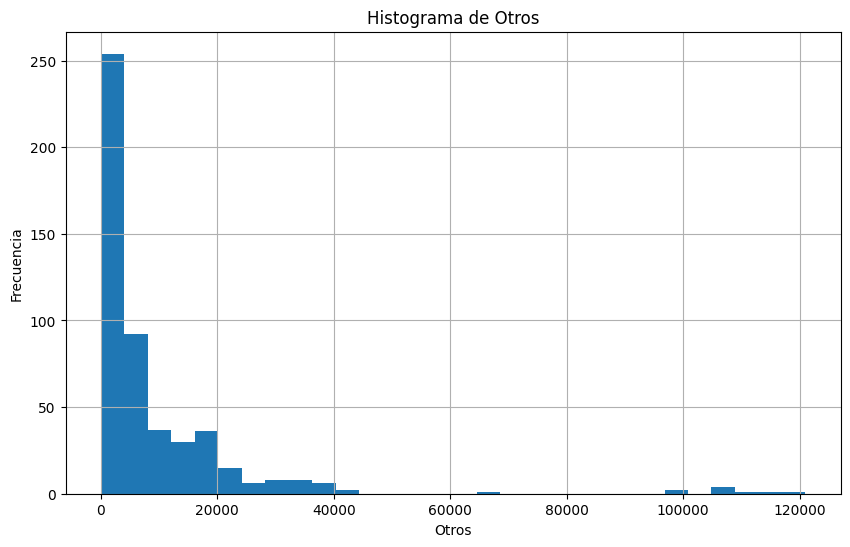

In [23]:
plt.figure(figsize=(10, 6))
acceso__internet_por_velocidad_bajada_provincia['Otros'].hist(bins=30)
plt.title('Histograma de Otros')
plt.xlabel('Otros')
plt.ylabel('Frecuencia')
plt.show()

Guardamos el archivo limpio en un csv

In [132]:
acceso__internet_por_velocidad_bajada_provincia.to_csv('Acceso internet por velocidad bajada provincia limpio.csv')

Abrimos el siguiente archivo de datos para su limpieza el cual es el de Internet acceso por velocidad por localidad

In [24]:
acceso_internet_por_bajada_localidad = pd.read_excel("dataexcel\Internet_Accesos-por-velocidad_por loc.xlsx")

Revisamos si hay nulos

In [25]:
acceso_internet_por_bajada_localidad.isnull().sum()

Provincia           0
Partido             0
Localidad           0
Link Indec          0
Otros            2133
                 ... 
900 Mbps         3094
950 Mbps         3094
1000 Mbps        2751
1024 Mbps        3094
Total general       1
Length: 134, dtype: int64

Vemos los primeros valores de la columna de nuestro df

In [26]:

acceso_internet_por_bajada_localidad.head()


,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Llenamos los valores nulos con 0

In [27]:

acceso_internet_por_bajada_localidad = acceso_internet_por_bajada_localidad.fillna(0)

Volvemos a revisar si hay nulos

In [28]:
acceso_internet_por_bajada_localidad.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros            0
                ..
900 Mbps         0
950 Mbps         0
1000 Mbps        0
1024 Mbps        0
Total general    0
Length: 134, dtype: int64

Usamos describe para ver los estadisticos de cada columna

In [29]:
acceso_internet_por_bajada_localidad.describe()

,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",1 Mbps,"1,25 Mbps","1,5 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
count,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,...,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3.095000e+03
mean,127.393215,0.031341,0.072698,9.854927,0.374152,0.035864,3.632633,24.010985,0.008078,0.642326,...,0.152504,0.000323,0.000969,0.205493,0.000323,0.035541,0.000323,19.505654,0.000323,3.621362e+03
std,2143.064346,0.691148,4.044382,500.969300,2.215210,1.995229,37.635741,173.324601,0.449376,21.644906,...,5.671690,0.017975,0.031124,9.909208,0.017975,1.977254,0.017975,309.388452,0.017975,3.024623e+04
min,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+02
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.055000e+03
max,106261.000000,31.000000,225.000000,27866.000000,61.000000,111.000000,1307.000000,6307.000000,25.000000,1170.000000,...,308.000000,1.000000,1.000000,546.000000,1.000000,110.000000,1.000000,16708.000000,1.000000,1.445665e+06


Vemos que hay un valor negativo en la columna de Otros

In [30]:
acceso_internet_por_bajada_localidad["Otros"].min()

-4.0

Confirmamos y vemos en donde esta valor -4

In [31]:
otros_values_below_zero = acceso_internet_por_bajada_localidad[acceso_internet_por_bajada_localidad['Otros'] < 0]['Otros']
print(otros_values_below_zero)

1811   -4.0
Name: Otros, dtype: float64


Visualisamos los valores de la columna de Otros con el -4

In [32]:
row_with_value_minus_four = acceso_internet_por_bajada_localidad[acceso_internet_por_bajada_localidad['Otros'] == -4]
row_with_value_minus_four

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
1811,LA RIOJA,OTROS,OTROS,Sin Datos,-4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0


Armamos todo el df con los valores de la columna de Otros menos el -4

In [33]:
acceso_internet_por_bajada_localidad = acceso_internet_por_bajada_localidad[acceso_internet_por_bajada_localidad['Otros'] != -4]

Usamos describe y vemos que no hay valores atipicos

In [34]:
acceso_internet_por_bajada_localidad.describe()

,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",1 Mbps,"1,25 Mbps","1,5 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
count,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,...,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3094.000000,3.094000e+03
mean,127.435682,0.031351,0.072721,9.858112,0.374273,0.035876,3.633807,24.018746,0.008080,0.642534,...,0.152553,0.000323,0.000970,0.205559,0.000323,0.035553,0.000323,19.511959,0.000323,3.622533e+03
std,2143.409454,0.691260,4.045036,501.050246,2.215557,1.995551,37.641768,173.352080,0.449448,21.648402,...,5.672607,0.017978,0.031129,9.910809,0.017978,1.977573,0.017978,309.438264,0.017978,3.025105e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+02
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.055500e+03
max,106261.000000,31.000000,225.000000,27866.000000,61.000000,111.000000,1307.000000,6307.000000,25.000000,1170.000000,...,308.000000,1.000000,1.000000,546.000000,1.000000,110.000000,1.000000,16708.000000,1.000000,1.445665e+06


Y revisamos nulos y tampoco hay

In [84]:
acceso_internet_por_bajada_localidad.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros            0
                ..
900 Mbps         0
950 Mbps         0
1000 Mbps        0
1024 Mbps        0
Total general    0
Length: 134, dtype: int64

Marcaba un error entonces convertimos a numerico el Total general y hacemos un boxplot para ver si hay outliers

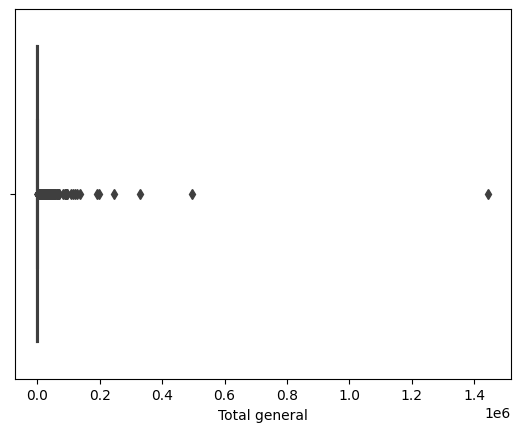

In [35]:
acceso_internet_por_bajada_localidad['Total general'] = pd.to_numeric(acceso_internet_por_bajada_localidad['Total general'])
sns.boxplot(x=acceso_internet_por_bajada_localidad['Total general'])
plt.show()

Ya limpio lo guardamos en un csv

In [85]:
acceso_internet_por_bajada_localidad.to_csv('Acceso internet por velocidad bajada localidad limpio.csv')

Procedemos a abrir el siguiente archivo de datos que es el historico velocidad internet

In [36]:
historico_velocidad_internet = pd.read_excel("dataexcel\historico_velocidad_internet.xlsx")

Usamos la funcion info para ver el tipo de datos de cada columna

In [150]:
historico_velocidad_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Vemos los primeros valores de nuestro df con head

In [151]:
historico_velocidad_internet.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


Como venimos haciendo, usamos la funcion describe para ver los estadisticos de cada columna

In [152]:
historico_velocidad_internet.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.00,864.00,864.00
mean,2018.00,2.50,15.38
std,2.58,1.12,18.32
min,2014.00,1.00,2.57
25%,2016.00,1.75,4.32
50%,2018.00,2.50,7.42
75%,2020.00,3.25,19.71
max,2022.00,4.00,182.86


Revisamos si tenemos nulos en el df

In [153]:
historico_velocidad_internet.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Vemos si existen duplicados

In [154]:
num_duplicated_rows = historico_velocidad_internet.duplicated().sum()
print(num_duplicated_rows)

0


Usamos un grafico para ver como a cambiado la media de velocidad de internet en los años

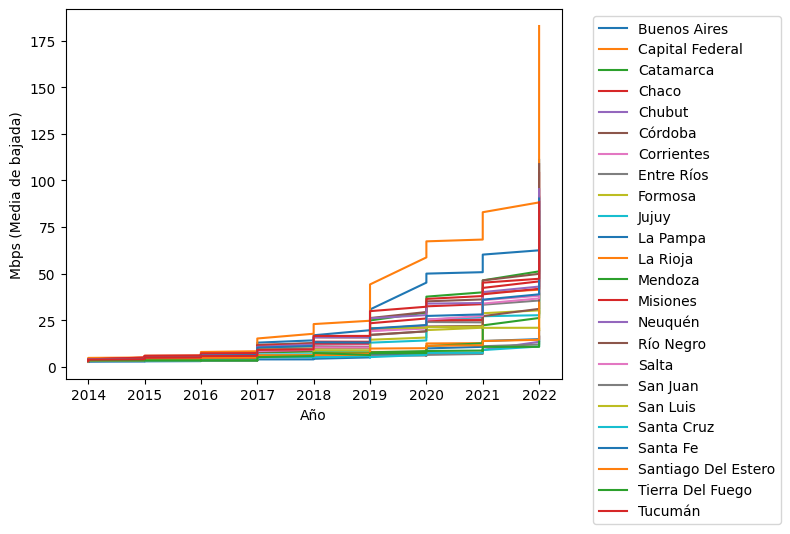

In [38]:
historico_velocidad_internet['Año'] = pd.to_numeric(historico_velocidad_internet['Año'])
historico_velocidad_internet['Mbps (Media de bajada)'] = pd.to_numeric(historico_velocidad_internet['Mbps (Media de bajada)'])
for provincia in historico_velocidad_internet['Provincia'].unique():
    data_provincia = historico_velocidad_internet[historico_velocidad_internet['Provincia'] == provincia]
    plt.plot(data_provincia['Año'], data_provincia['Mbps (Media de bajada)'], label=provincia)

plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Despues de tenerlo limpio lo guardamos en un csv

In [155]:
historico_velocidad_internet.to_csv('Historico velocidad internet limpio.csv')

Analisamos el siguiente archivo de datos que es el de Internet acceso por tegnologia

In [232]:
internet_accesos_por_tegnologia_provincia = pd.read_excel("dataexcel\Internet_Accesos-por-tecnologia.xlsx", sheet_name= "Accesos Por Tecnología")

Vemos los primeros valores de nuestro df

In [233]:
internet_accesos_por_tegnologia_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022,4,Buenos Aires,325908.00,2767247.00,1499149.00,129910.00,72451.00,4794665.00,NaN,NaN,Buenos Aires,325908.00,2767247.00,1499149.00,129910.00,72451.00,4794665.00
1,2022,4,Capital Federal,138753.00,1238196.00,138548.00,4603.00,31826.00,1551926.00,NaN,NaN,Capital Federal,138753.00,1238196.00,138548.00,4603.00,31826.00,1551926.00
2,2022,4,Catamarca,8952.00,10998.00,47337.00,1379.00,2243.00,70909.00,NaN,NaN,Catamarca,8952.00,10998.00,47337.00,1379.00,2243.00,70909.00
3,2022,4,Chaco,24582.00,61265.00,47285.00,7957.00,2574.00,143663.00,NaN,NaN,Chaco,24582.00,61265.00,47285.00,7957.00,2574.00,143663.00
4,2022,4,Chubut,45450.00,73923.00,9815.00,30721.00,8850.00,168759.00,NaN,NaN,Chubut,45450.00,73923.00,9815.00,30721.00,8850.00,168759.00


Tomamos solo las columnas que necesitamos

In [234]:

internet_accesos_por_tegnologia_provincia = internet_accesos_por_tegnologia_provincia.iloc[:, :9]

Revisamos si tenemos nulos en nuestro df

In [235]:
internet_accesos_por_tegnologia_provincia.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

Al tener nulos procedemos a revisar que filas tienen esos nulos

In [236]:
nulos_1 = internet_accesos_por_tegnologia_provincia[internet_accesos_por_tegnologia_provincia.isnull().any(axis=1)]
nulos_1

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Al no ser relevantes los datos de las filas con nulos, procedemos a borrarlas

In [237]:
internet_accesos_por_tegnologia_provincia = internet_accesos_por_tegnologia_provincia.dropna()

Revisamos de nuevo si hay nulos

In [230]:
internet_accesos_por_tegnologia_provincia.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Utilizamos info para ver el tipo de datos de cada columna

In [238]:
internet_accesos_por_tegnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           864 non-null    object 
 1   Trimestre     864 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.5+ KB


Usamos describe para ver los estadisticos de cada columna

In [239]:
internet_accesos_por_tegnologia_provincia.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.00,864.00,864.00,864.00,864.00,864.00
mean,125545.71,173991.31,32623.31,10720.80,6228.97,349110.10
std,252051.42,427631.33,132542.98,18723.09,10740.93,749485.37
min,6120.00,0.00,0.00,0.00,2.00,12557.00
25%,22320.25,8912.50,205.25,261.00,313.00,52329.00
50%,48161.00,34984.00,1233.00,4377.00,1862.50,104596.50
75%,102547.00,71683.25,15642.50,12673.75,7128.00,180174.50
max,1586343.00,2767247.00,1499149.00,129910.00,73415.00,4794665.00


Vemos los valores en la columna año y vemos hay un año 2019 * que no corresponde

In [242]:
internet_accesos_por_tegnologia_provincia.value_counts("Año")

Año
2014      96
2015      96
2016      96
2017      96
2018      96
2020      96
2021      96
2022      96
2019 *    72
2019      24
Name: count, dtype: int64

Lo convertimos en str y a valor 2019

In [243]:

internet_accesos_por_tegnologia_provincia['Año'] = internet_accesos_por_tegnologia_provincia['Año'].replace('2019 *', '2019').astype(int)

Verificamos otra vez los valores de la columna y vemos ya esta junto con 2019

In [244]:
internet_accesos_por_tegnologia_provincia.value_counts("Año")

Año
2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2021    96
2022    96
Name: count, dtype: int64

Creamos una grafica para ver como a crecido las tegnologias por el paso de los años

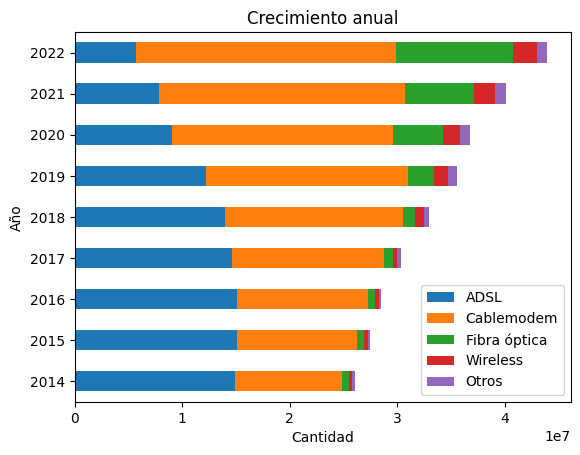

In [245]:

crecimiento_anual = internet_accesos_por_tegnologia_provincia.groupby('Año')[["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros"]].sum()
crecimiento_anual.plot.barh(stacked=True)
plt.title('Crecimiento anual')
plt.xlabel('Cantidad')
plt.ylabel('Año')
plt.show()

Al tenerlo limpio lo guardamos en un csv

In [246]:
internet_accesos_por_tegnologia_provincia.to_csv('Internet accesos por tecnologia provincia limpio.csv')

Abrimos nuestro archivo excel y lo convertimos en un df

In [2]:
internet_accesos_por_velocidad_provincia_ = pd.read_excel("dataexcel\Internet_Accesos-por-velocidad.xlsx", sheet_name= "Accesos por velocidad")

Vemos los primeros valores de nuestro df

In [3]:
internet_accesos_por_velocidad_provincia_.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


Revisamos si tenemos nulos en nuestro df

In [4]:
internet_accesos_por_velocidad_provincia_.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

LLenamos los nulos con 0 por que no son relevantes en la columna total

In [5]:
internet_accesos_por_velocidad_provincia_ = internet_accesos_por_velocidad_provincia_.fillna(0)

Revisamos si tenemos nulos en nuestro df otra vez

In [6]:
internet_accesos_por_velocidad_provincia_.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

Usamos info para ver el tipo de datos de cada columna

In [7]:
internet_accesos_por_velocidad_provincia_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                864 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


In [281]:
internet_accesos_por_velocidad_provincia_.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.00,23347.00,259866.00,281550.00,244555.00,98670.00,3760109.00,97634.00,4794665.00
1,2022,4,Capital Federal,516.00,5096.00,31320.00,64653.00,36336.00,8116.00,1299117.00,106772.00,1551926.00
2,2022,4,Catamarca,71.00,315.00,2716.00,5028.00,4638.00,3122.00,52739.00,2280.00,70909.00
3,2022,4,Chaco,461.00,771.00,16067.00,17846.00,6704.00,3039.00,94866.00,3909.00,143663.00
4,2022,4,Chubut,109.00,1614.00,46457.00,31007.00,34728.00,15770.00,19048.00,20026.00,168759.00


Creamos un grafico de dispercion para analsiar los outliers, en este caso existen pero es por que son provincias con alto promedio

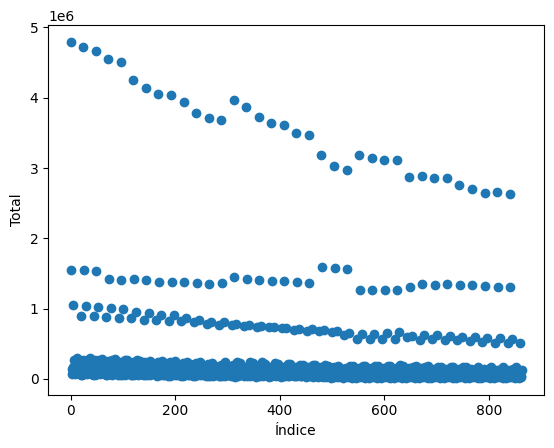

In [8]:
internet_accesos_por_velocidad_provincia_['Total'] = pd.to_numeric(internet_accesos_por_velocidad_provincia_['Total'])
plt.scatter(range(internet_accesos_por_velocidad_provincia_.shape[0]), internet_accesos_por_velocidad_provincia_['Total'])
plt.xlabel('Índice')
plt.ylabel('Total')
plt.show()

Ya teniendolo limpio lo guardamos en un csv

In [283]:
internet_accesos_por_velocidad_provincia_.to_csv('Internet accesos por velocidad por provincia limpio.csv')

Seguimos con el siguiente archivo de datos que es el de Internet BAF, usando la primera pagina del excel

In [9]:
internet_baf = pd.read_excel("dataexcel\Internet_BAF (1).xlsx", sheet_name= "Totales")

Vemos los primeros valores de nuestro df

In [10]:
internet_baf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022
1,2022,3,11078691,12437,11091128,Jul-Sept 2022
2,2022,2,10946248,12436,10958684,Abr-Jun 2022
3,2022,1,10611390,12619,10624009,Ene-Mar 2022
4,2021,4,10476933,12861,10489794,Oct-Dic 2021


Revisamos si tenemos nulos en nuestro df

In [11]:
internet_baf.isnull().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

Usamos la funcion info para ver el tipo de datos de cada columna

In [12]:
internet_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


Vemos si son valores unicos en la columna de Banda Ancha Fija

In [13]:
internet_baf.value_counts("Banda ancha fija")

Banda ancha fija
6362108     1
6428329     1
8626323     1
8783053     1
8802435     1
8938427     1
9021040     1
9142891     1
9346183     1
9561546     1
9637956     1
9852702     1
10075184    1
10476933    1
10611390    1
10946248    1
11078691    1
8451841     1
8320223     1
8083533     1
6952289     1
6559172     1
6559264     1
6699714     1
6783279     1
6874704     1
6902267     1
7097604     1
8009981     1
7178340     1
7223128     1
7277314     1
7401134     1
7696594     1
7842778     1
11195668    1
Name: count, dtype: int64

Usamos describe para ver los estadisticos de cada columna

In [14]:
internet_baf.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,36.000000,36.000000,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,8.355563e+06,23079.555556,8.378642e+06
std,2.618615,1.133893,1.471390e+06,10107.978375,1.462265e+06
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06
25%,2016.000000,1.750000,7.061275e+06,12436.750000,7.093767e+06
50%,2018.000000,2.500000,8.201878e+06,26861.500000,8.228740e+06
75%,2020.000000,3.250000,9.400024e+06,32491.750000,9.410040e+06
max,2022.000000,4.000000,1.119567e+07,39324.000000,1.120811e+07


Creamos una grafica para ver el crecimiento de esas dos tegnologias

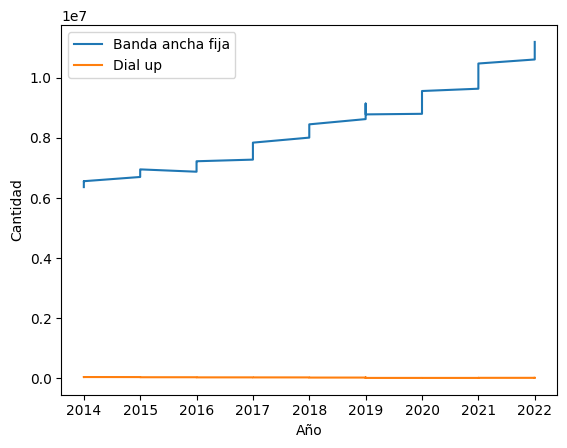

In [16]:

internet_baf['Año'] = pd.to_numeric(internet_baf['Año'])
internet_baf['Banda ancha fija'] = pd.to_numeric(internet_baf['Banda ancha fija'])
internet_baf['Dial up'] = pd.to_numeric(internet_baf['Dial up'])
plt.plot(internet_baf['Año'], internet_baf['Banda ancha fija'], label='Banda ancha fija')
plt.plot(internet_baf['Año'], internet_baf['Dial up'], label='Dial up')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

Al tenerlo limpio lo guardamos en un csv

In [265]:
internet_baf.to_csv('Total nacional de accesos a Internet fijo por banda ancha y banda angosta.csv')

Ahora tenemos el archivo de datos de mapa conectividad en excel

In [18]:
listado_localidades_conectadas_internet = pd.read_excel("dataexcel\mapa_conectividad.xlsx")

Vemos las primeras filas de nuestro df

In [19]:
listado_localidades_conectadas_internet.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.0,-35.520141,-60.998949


Usamos info para ver el tipo de datos de cada columna

In [20]:
listado_localidades_conectadas_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


Revisamos si tenemos nulos en nuestro df

In [21]:
listado_localidades_conectadas_internet.isnull().sum()

Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64

Remplasamos los -- con un No, para no tener problemas con los datos

In [22]:
listado_localidades_conectadas_internet = listado_localidades_conectadas_internet.replace("--", "No")

Vemos las primeras filas de nuestro df para ver que cambio

In [23]:
listado_localidades_conectadas_internet.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,No,No,No,No,No,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,No,No,No,No,No,No,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,No,No,SI,No,No,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,No,No,No,No,No,No,No,No,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,No,No,SI,No,No,SI,SI,SI,6588060.0,-35.520141,-60.998949


Vemos las filas con nulos para ver si podemos eliminarlos o cambiarlos con 0

In [24]:

filas_con_nulos33 = listado_localidades_conectadas_internet[listado_localidades_conectadas_internet.isnull().any(axis=1)]
filas_con_nulos33

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3112,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,No,No,No,No,No,No,No,No,No,NaN,-77.874009,-34.626560
3113,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,No,No,No,No,No,No,No,No,No,NaN,-64.895348,-62.870538
3114,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,No,No,No,No,No,No,No,No,No,NaN,-62.238369,-58.667544
3115,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,No,No,No,No,No,No,No,No,SI,NaN,-63.397393,-56.997322
3116,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,No,No,No,No,No,No,No,SI,SI,NaN,-64.240614,-56.625096
3117,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,No,No,No,No,No,No,No,No,No,NaN,-64.975862,-60.070679
3118,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,No,No,No,No,No,No,No,No,No,NaN,-60.737817,-44.737660
3119,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,No,No,No,No,No,No,No,No,No,NaN,-68.130070,-67.101330
3120,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,No,No,No,No,No,No,No,No,No,NaN,-62.594350,-59.919054
3121,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,No,No,No,No,No,No,No,No,No,NaN,-62.975332,-60.698223


Cambiamos los nulos con 0

In [25]:

listado_localidades_conectadas_internet = listado_localidades_conectadas_internet.fillna(0)

Vemos si despues de hacerlo hay nulos

In [26]:
listado_localidades_conectadas_internet.isnull().sum()

Provincia         0
Partido           0
Localidad         0
Población         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
Satelital         0
Wireless          0
Telefonía Fija    0
3G                0
4G                0
Link              0
Latitud           0
Longitud          0
dtype: int64

Revisamos si hay duplicados

In [27]:
listado_localidades_conectadas_internet.duplicated().sum()

0

Creamos un grafico para ver la distribucion de las tegnologias y cuantas localidades tienen dichas tegnologias

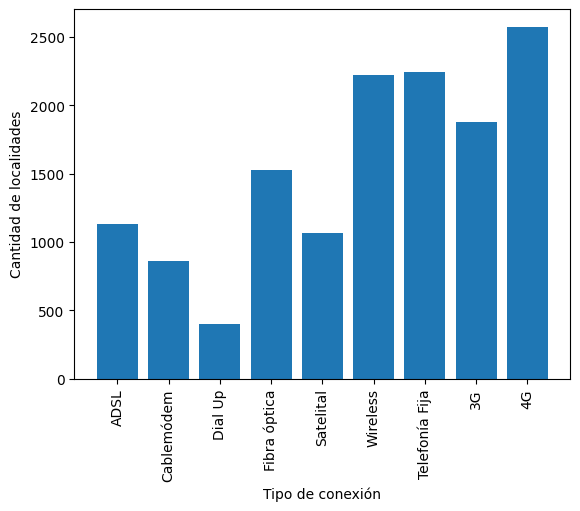

In [28]:
conexiones = {
    'ADSL': listado_localidades_conectadas_internet['ADSL'].value_counts()['SI'],
    'Cablemódem': listado_localidades_conectadas_internet['Cablemódem'].value_counts()['SI'],
    'Dial Up': listado_localidades_conectadas_internet['Dial Up'].value_counts()['SI'],
    'Fibra óptica': listado_localidades_conectadas_internet['Fibra óptica'].value_counts()['SI'],
    'Satelital': listado_localidades_conectadas_internet['Satelital'].value_counts()['SI'],
    'Wireless': listado_localidades_conectadas_internet['Wireless'].value_counts()['SI'],
    'Telefonía Fija': listado_localidades_conectadas_internet['Telefonía Fija'].value_counts()['SI'],
    '3G': listado_localidades_conectadas_internet['3G'].value_counts()['SI'],
    '4G': listado_localidades_conectadas_internet['4G'].value_counts()['SI'],
}
plt.bar(conexiones.keys(), conexiones.values())
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad de localidades')
plt.xticks(rotation=90)
plt.show()

Despues de tenerlo limpio lo guardamos en un csv

In [55]:
listado_localidades_conectadas_internet.to_csv('Listado de localidades conectadas a internet limpio.csv')

Procedemos a abrir el siguiente archivo de datos que es el de Internet penetracion

In [284]:
penetracion_internet_fijo_100 = pd.read_excel("dataexcel\Internet_Penetracion.xlsx", sheet_name="Penetracion-hogares")

Vemos las primeras filas de nuestro df

In [285]:
penetracion_internet_fijo_100.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


Usamos info para ver el tipo de datos de cada columna

In [286]:
penetracion_internet_fijo_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Vemos si tiene nulos nuestro df

In [287]:
penetracion_internet_fijo_100.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

Revisamos los valores de la columna Provincia para ver si hay algun int

In [289]:
penetracion_internet_fijo_100.value_counts("Provincia")

Provincia
Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Córdoba                36
Corrientes             36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: count, dtype: int64

Realizamos el mismo proceso de revisas los valores en Año para ver anomalias

In [290]:
penetracion_internet_fijo_100.value_counts("Año")

Año
2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2021    96
2022    96
Name: count, dtype: int64

Hacemos un boxplot para ver si hay outliers

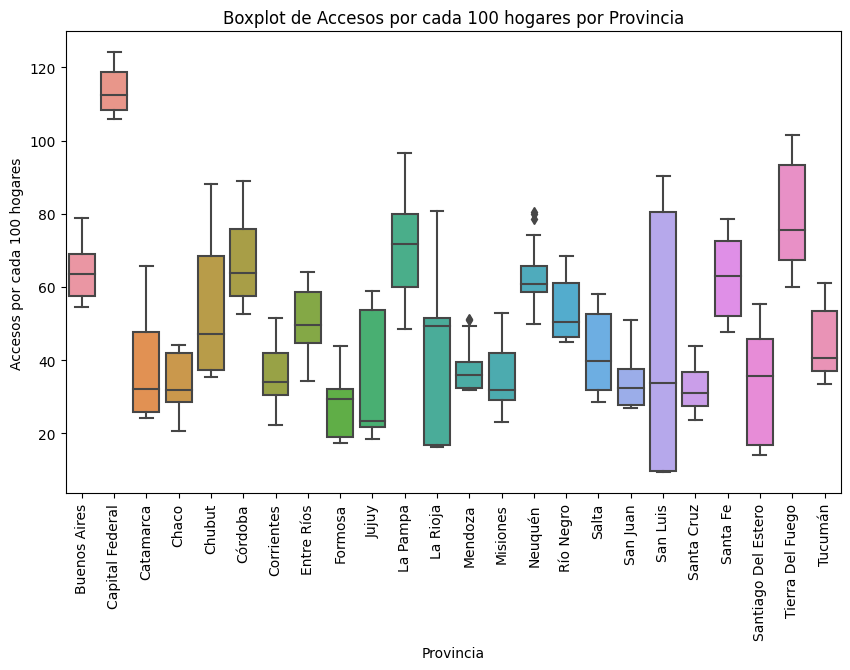

In [292]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=penetracion_internet_fijo_100)
plt.xticks(rotation=90)
plt.title('Boxplot de Accesos por cada 100 hogares por Provincia')
plt.show()

Vemos el aumento en promedio de la ciudad de Buenos Aires atraves de los años

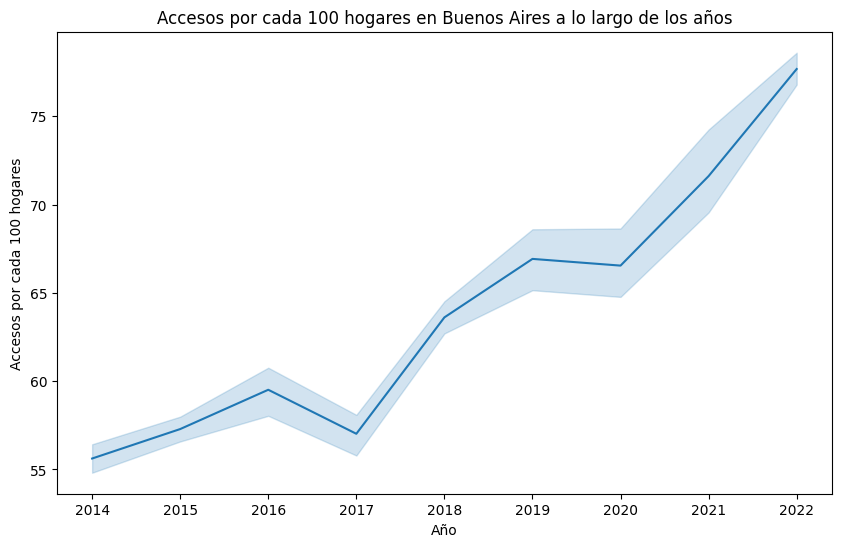

In [293]:
datos_buenos_aires = penetracion_internet_fijo_100[penetracion_internet_fijo_100['Provincia'] == 'Buenos Aires']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=datos_buenos_aires)
plt.title('Accesos por cada 100 hogares en Buenos Aires a lo largo de los años')
plt.show()

Este grafico muestra lo mismo en Formosa

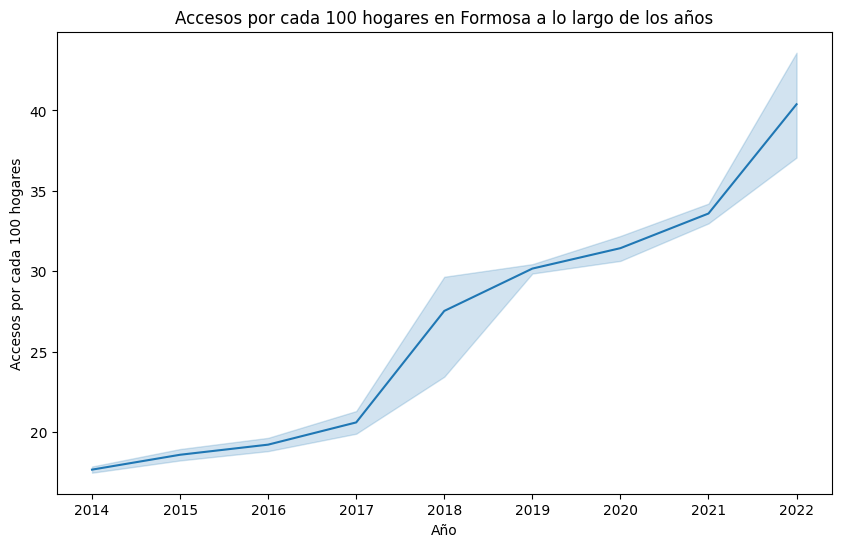

In [294]:
datos_formosa = penetracion_internet_fijo_100[penetracion_internet_fijo_100['Provincia'] == 'Formosa']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=datos_formosa)
plt.title('Accesos por cada 100 hogares en Formosa a lo largo de los años')
plt.show()

Hacemos lo mismo para capital federal

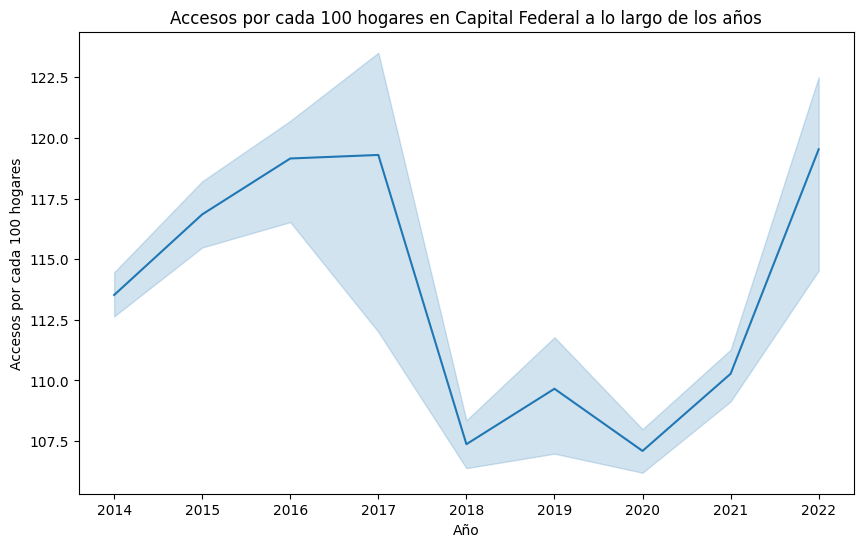

In [295]:
datos_capital_federal = penetracion_internet_fijo_100[penetracion_internet_fijo_100['Provincia'] == 'Capital Federal']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=datos_capital_federal)
plt.title('Accesos por cada 100 hogares en Capital Federal a lo largo de los años')
plt.show()

Grafica para Tucuman

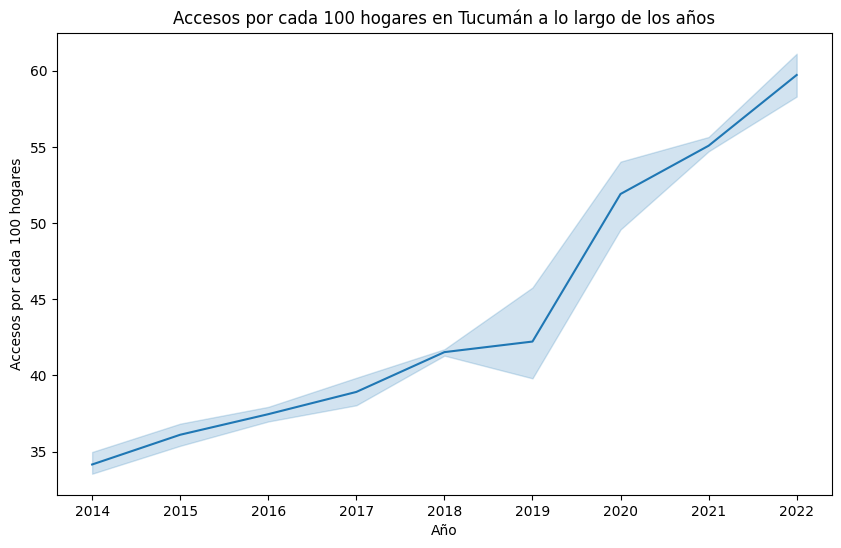

In [296]:
datos_Tucumán = penetracion_internet_fijo_100[penetracion_internet_fijo_100['Provincia'] == 'Tucumán']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=datos_Tucumán)
plt.title('Accesos por cada 100 hogares en Tucumán a lo largo de los años')
plt.show()

Grafica para la provincia de San Luis

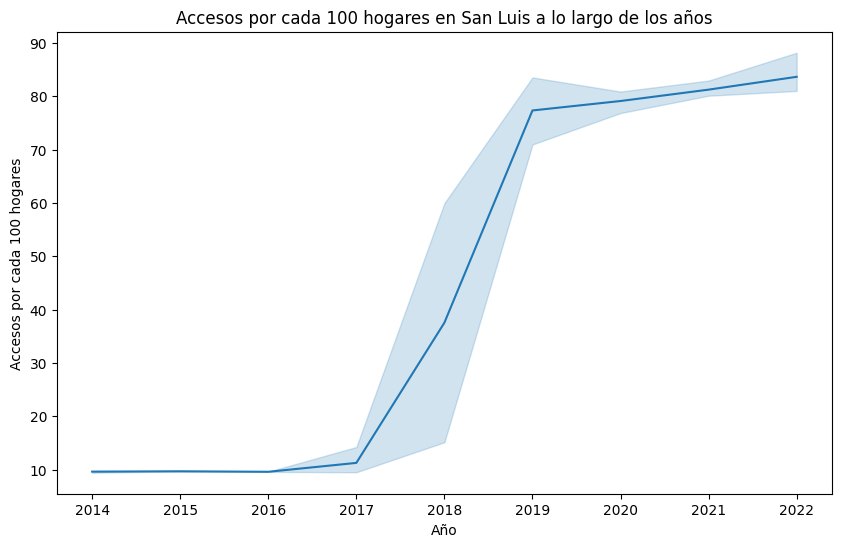

In [297]:

datos_san_luis = penetracion_internet_fijo_100[penetracion_internet_fijo_100['Provincia'] == 'San Luis']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=datos_san_luis)
plt.title('Accesos por cada 100 hogares en San Luis a lo largo de los años')
plt.show()

Aplicamos el primer KPI que es el de la penetracion de internet

In [299]:

penetracion_internet_fijo_100['Nuevo acceso'] = penetracion_internet_fijo_100['Accesos por cada 100 hogares'] * 1.02

Vemos las primeras filas de nuestro df con la nueva columna

In [300]:
penetracion_internet_fijo_100.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Nuevo acceso
0,2022,4,Buenos Aires,78.94,80.52
1,2022,4,Capital Federal,122.73,125.18
2,2022,4,Catamarca,65.77,67.09
3,2022,4,Chaco,43.62,44.49
4,2022,4,Chubut,85.57,87.28


Creeamos una grafica para ver la penetracion de internet en las provincias con tres provincias

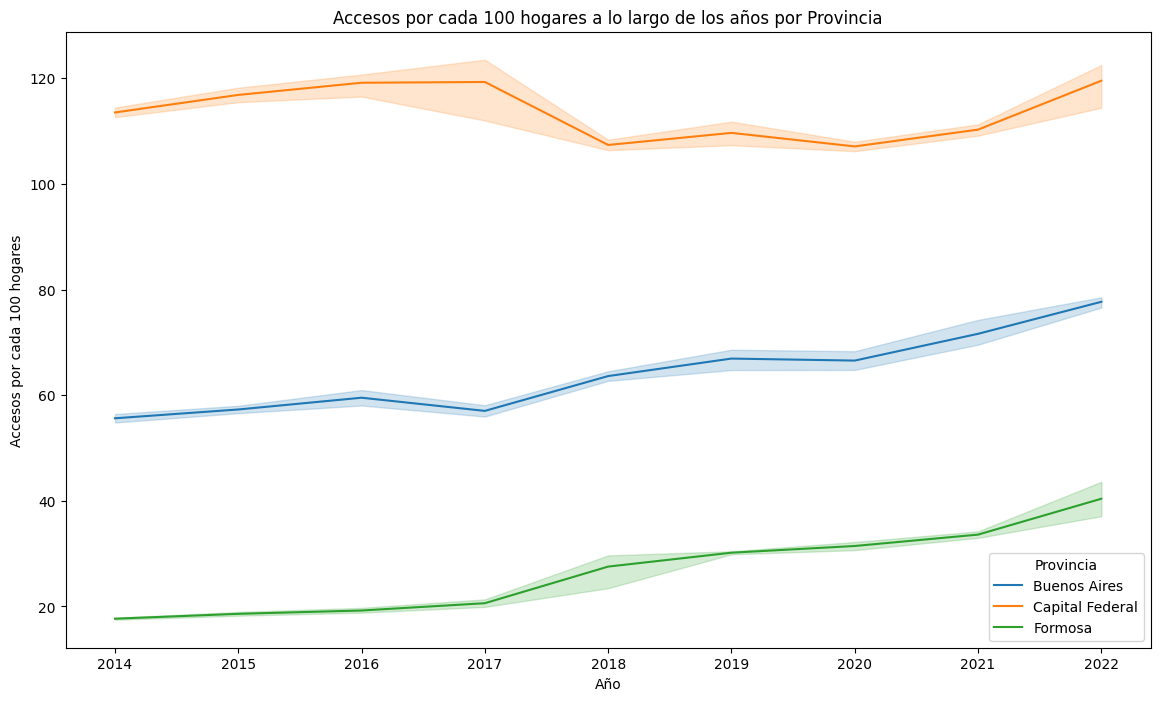

In [301]:
datos_filtrados = penetracion_internet_fijo_100[penetracion_internet_fijo_100['Provincia'].isin(['Buenos Aires', 'Formosa', 'Capital Federal'])]
plt.figure(figsize=(14, 8))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', data=datos_filtrados, legend='full')
plt.title('Accesos por cada 100 hogares a lo largo de los años por Provincia')
plt.show()

Guardamos el archivo limpio en un csv

In [302]:
penetracion_internet_fijo_100.to_csv('Penetracion internet fijo 100 hogares limpio.csv')

Abrimos el siguiente archivo de datos que es el de Internet penetracion por poblacion

In [304]:
penetracion_internet_fijo_100_poblacion = pd.read_excel("dataexcel\Internet_Penetracion.xlsx", sheet_name="Penetración-poblacion")

Vemos las primeras filas de nuestro df

In [305]:
penetracion_internet_fijo_100_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.72
1,2022,4,Capital Federal,50.35
2,2022,4,Catamarca,16.73
3,2022,4,Chaco,11.66
4,2022,4,Chubut,26.23


Revisamos si tiene nulos nuestro df

In [306]:
penetracion_internet_fijo_100_poblacion.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

Usamos info para ver el tipo de datos de cada columna

In [307]:
penetracion_internet_fijo_100_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       864 non-null    int64  
 1   Trimestre                 864 non-null    int64  
 2   Provincia                 864 non-null    object 
 3   Accesos por cada 100 hab  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Posterior, usamos describe para ver los estadisticos de cada columna

In [308]:
penetracion_internet_fijo_100_poblacion.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,864.00,864.00,864.00
mean,2018.00,2.50,14.81
std,2.58,1.12,9.02
min,2014.00,1.00,2.68
25%,2016.00,1.75,8.39
50%,2018.00,2.50,12.87
75%,2020.00,3.25,19.08
max,2022.00,4.00,52.24


Creeamos una grafica para ver la provincia con mayor penetracion de internet por cada 100 habitantes

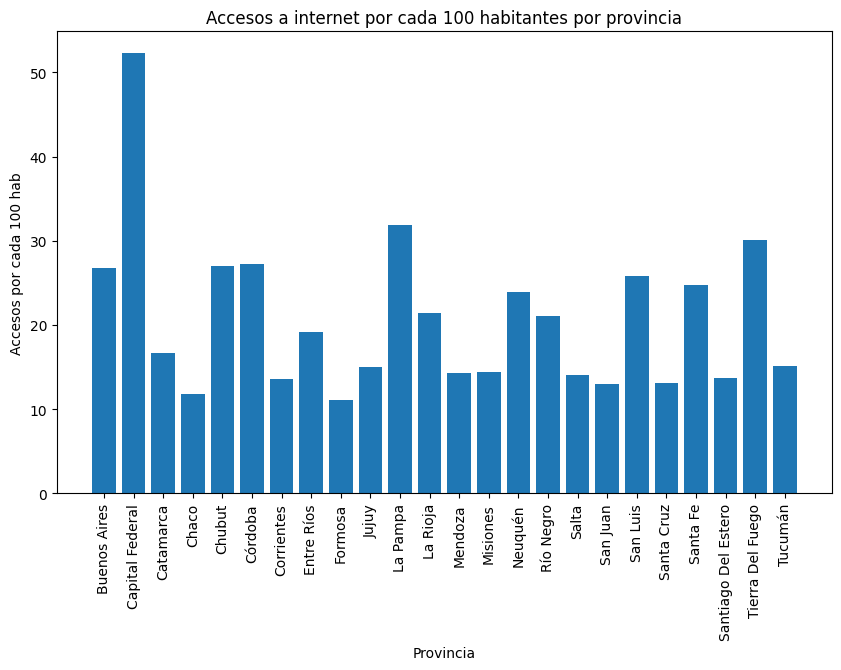

In [311]:

plt.figure(figsize=(10, 6))


plt.bar(penetracion_internet_fijo_100_poblacion['Provincia'], penetracion_internet_fijo_100_poblacion['Accesos por cada 100 hab'])

plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Accesos a internet por cada 100 habitantes por provincia')

plt.xticks(rotation=90) 

plt.show()

Guardamos el archivo limpio en un csv

In [309]:
penetracion_internet_fijo_100_poblacion.to_csv('Penetracion internet fijo 100 poblacion limpio.csv')

Abrimos nuestro archivo excel y lo convertimos en un df

In [321]:
penetracion_internet_fijo_100_totales = pd.read_excel("dataexcel\Internet_Penetracion.xlsx", sheet_name="Penetracion-totales")

Vemos las primeras filas de nuestro df

In [322]:
penetracion_internet_fijo_100_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.21,24.15,Oct-Dic 2022
1,2022,3,76.64,23.95,Jul-Sept 2022
2,2022,2,75.97,23.72,Abr-Jun 2022
3,2022,1,73.88,23.05,Ene-Mar 2022
4,2021,4,73.18,22.81,Oct-Dic 2021


Revisamos si tiene nulos nuestro df

In [323]:
penetracion_internet_fijo_100_totales.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

Usamos describe para ver los estadisticos de cada columna

In [324]:
penetracion_internet_fijo_100_totales.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,36.00,36.00,36.00,36.00
mean,2018.00,2.50,60.75,18.76
std,2.62,1.13,8.51,2.78
min,2014.00,1.00,49.55,15.05
25%,2016.00,1.75,53.16,16.31
50%,2018.00,2.50,59.93,18.48
75%,2020.00,3.25,66.64,20.70
max,2022.00,4.00,77.21,24.15


Creamos una grafica para comparar el crecimiento por cada 100 habitantes y cada 100 hogares

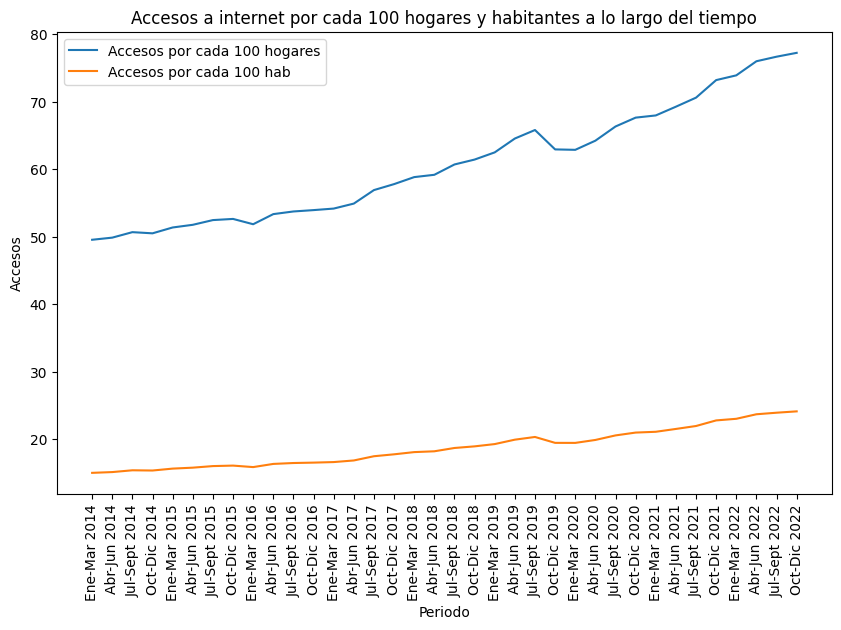

In [325]:

penetracion_internet_fijo_100_totales = penetracion_internet_fijo_100_totales.sort_values(by=['Año', 'Trimestre'])  # Ordenar los datos por Año y Trimestre

plt.figure(figsize=(10, 6))


plt.plot(penetracion_internet_fijo_100_totales['Periodo'], penetracion_internet_fijo_100_totales['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares')
plt.plot(penetracion_internet_fijo_100_totales['Periodo'], penetracion_internet_fijo_100_totales['Accesos por cada 100 hab'], label='Accesos por cada 100 hab')

plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.title('Accesos a internet por cada 100 hogares y habitantes a lo largo del tiempo')
plt.legend()

plt.xticks(rotation=90)

plt.show()

Para confirmar vemos las primeras filas de nuestro df

In [326]:
penetracion_internet_fijo_100_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
35,2014,1,49.55,15.05,Ene-Mar 2014
34,2014,2,49.86,15.16,Abr-Jun 2014
33,2014,3,50.67,15.43,Jul-Sept 2014
32,2014,4,50.50,15.39,Oct-Dic 2014
31,2015,1,51.36,15.68,Ene-Mar 2015


Lo guardamos en un csv ya limpio

In [327]:
penetracion_internet_fijo_100_totales.to_csv('Penetracion internet fijo 100 totales limpio.csv')

Abrimos el de ingresos de internet

In [86]:
internet_ingresos = pd.read_excel("dataexcel\Internet_Ingresos.xlsx")

Cambiamos el index para tenerlo de años asendente

In [95]:
pd.options.display.float_format = '{:.2f}'.format
internet_ingresos = internet_ingresos.sort_index(ascending=False)
internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
35,2014,1,2984054.21,Ene-Mar 2014
34,2014,2,3270816.20,Abr-Jun 2014
33,2014,3,3478637.74,Jul-Sept 2014
32,2014,4,3950440.78,Oct-Dic 2014
31,2015,1,4876385.32,Ene-Mar 2015


Revisamos si tenemos valores nulos en nuestro df

In [96]:
internet_ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

Pasamos a int la columna Ingresos

In [98]:

internet_ingresos['Ingresos (miles de pesos)'] = internet_ingresos['Ingresos (miles de pesos)'].astype(int)

Revisamos los valores distintos de la columna de Ingresos

In [99]:
internet_ingresos.value_counts("Ingresos (miles de pesos)")

Ingresos (miles de pesos)
2984054     1
3270816     1
20207413    1
20743117    1
21652748    1
24169250    1
29946216    1
31997444    1
32102475    1
33539702    1
36676371    1
38239666    1
42999944    1
45467887    1
55219313    1
60419500    1
64086784    1
16637686    1
15410980    1
14319467    1
5936844     1
3478637     1
3950440     1
4701790     1
4876385     1
5153738     1
5376899     1
6534240     1
13171459    1
6912441     1
7483980     1
8701201     1
9678646     1
10065997    1
11226127    1
72443482    1
Name: count, dtype: int64

Creamos unas grafica con las ganancias alo largo de los trimestres

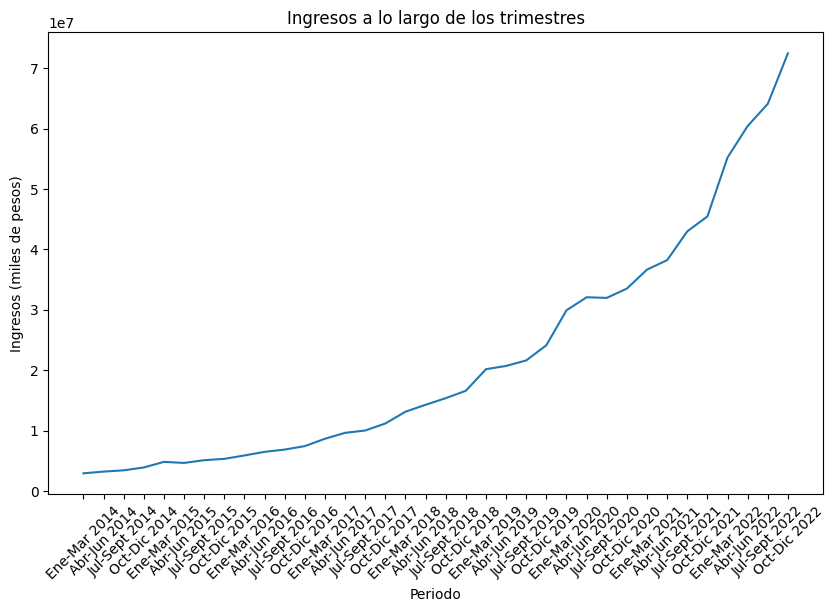

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Periodo', y='Ingresos (miles de pesos)', data=internet_ingresos)
plt.title('Ingresos a lo largo de los trimestres')
plt.xticks(rotation=45)
plt.show()

Ya con el archivo limpio lo guardamos en un csv

In [105]:
internet_ingresos.to_csv('Internet ingresos limpio.csv')

Leemos el siguiente archivo de datos que es el de Internet accesos por velocidad por provincia

In [133]:
internet_acceso_por_velocidad = pd.read_excel("dataexcel\Internet_Accesos-por-velocidad.xlsx")

Vemos las primeras filas de nuestro df

In [134]:
internet_acceso_por_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


Usamos info para ver el tipo de datos de cada columna

In [135]:
internet_acceso_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      36 non-null     int64
 1   Trimestre                36 non-null     int64
 2   Hasta 512 kbps           36 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   36 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  36 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  36 non-null     int64
 8   Más de 30 Mbps           36 non-null     int64
 9   OTROS                    36 non-null     int64
 10  Total                    36 non-null     int64
dtypes: int64(11)
memory usage: 3.2 KB


Verificamos si tiene nulos de nuevo

In [136]:
internet_acceso_por_velocidad.isnull().sum()

Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64

Creamos una grafica para ver en el ultimo semestre con las medias de las bajadas de internet

In [144]:
ultimo_trimestre = internet_acceso_por_velocidad.iloc[0][2:-1]
fig = px.pie(values=ultimo_trimestre, names=ultimo_trimestre.index, hole=0.3)
fig.update_traces(textinfo='percent+label')
fig.show()

Ya con el df limpio, procedemos a guardarlo en un csv

In [145]:
internet_acceso_por_velocidad.to_csv('Internet acceso por velocidad limpio.csv')